KOSPI200.KS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KOSPI200.KS: No data found for this date range, symbol may be delisted


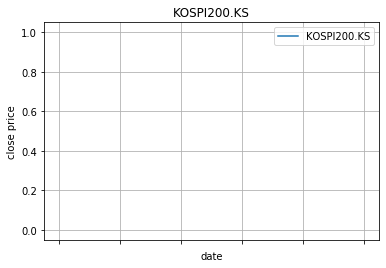

005935.KS
[*********************100%***********************]  1 of 1 completed


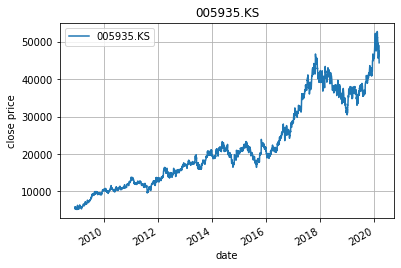

252670.KS
[*********************100%***********************]  1 of 1 completed


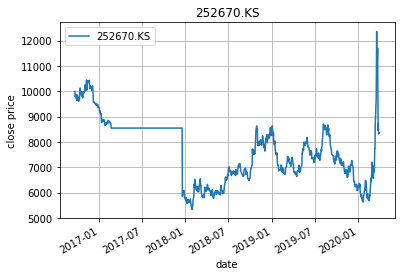

In [2]:
# https://medium.com/@jouneidraza522/yahoo-finance-api-to-get-stocks-tickers-data-in-python-c49820249a18
# https://towardsdatascience.com/collect-trading-data-with-pandas-library-8904659f2122
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd

# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
ticker_list=['DJIA', 'PXD', 'MCHP', 'CRM', 'JEC', 'NRG', 'HFC', 'NOW', 'AMZN','DAL','207940.KS']
ticker_list=['114800.KS', '122630.KS', '219480.KS', '207940.KS']
ticker_list=['005930.KS', '005935.KS', '000660.KS', '005380.KS', '012330.KS', '035420.KS',
             '051910.KS', '068270.KS', '017670.KS', '055550.KS', '207940.KS', '122630.KS']
ticker_list=['KOSPI200.KS', '005935.KS', '252670.KS']
today = date.today()
# We can get data by our choice by giving days bracket
start_date= "2008-11-30"
end_date="2020-03-10"
files=[]

def getData(ticker):
    print (ticker)
    data = pdr.get_data_yahoo(ticker, start=start_date, end=today)
    dataname= ticker+'_'+str(today)
    files.append(dataname)
    SaveData(data, dataname)
    return(data)

# Create a data folder in your current dir.
def SaveData(df, filename):
    df.to_csv('./stockmarket/'+filename+'.csv')
#     print(df)

newDF=[]
#This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    newDF = getData(tik)
    close = newDF[['Close']]
    # rename the column with symbole name
    symbol = tik
    close = close.rename(columns={'Close': symbol})
    ax = close.plot(title=tik)
    ax.set_xlabel('date')
    ax.set_ylabel('close price')
    ax.grid()
    plt.show()

# for i in range(0,11):
#     df1= pd.read_csv('./data/'+ str(files[i])+'.csv')
#     print (df1.head())



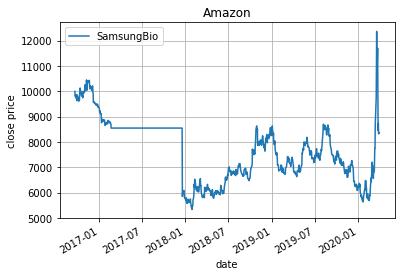

In [3]:
# select only close column
# df = ticker_list['207940.KS']
import matplotlib.pyplot as plt
df = newDF
close = df[['Close']]
# rename the column with symbole name
symbol = 'SamsungBio'
close = close.rename(columns={'Close': symbol})
ax = close.plot(title='Amazon')
ax.set_xlabel('date')
ax.set_ylabel('close price')
ax.grid()
plt.show()

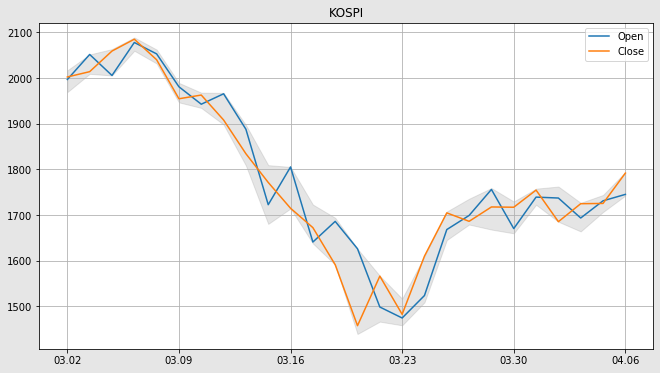

In [215]:
import matplotlib.pyplot as plt
import investpy
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates

asset = 'KOSPI 200'
asset = 'KOSPI 200 Future'
asset = 'KOSPI 200 Futures Inverse'
asset = 'KOSPI'
# fromDate = '01/03/2020'
tickFreq = 5
today = date.today()
fromDate = today - timedelta(weeks=5) - timedelta(days=1)
fromDate = fromDate.strftime("%d/%m/%Y")

etfs_kr = investpy.etfs.get_etfs('south korea')
# print("\n".join([name for name in etfs_kr['name']]))

def getData(name):
    df = investpy.get_index_historical_data(index=name,
                                    country='south korea',
                                    interval='Daily',
                                    from_date=fromDate,
                                    to_date=today.strftime("%d/%m/%Y"))
    # delete non-business day
    df = df[~(df.iloc[:,1] == df.iloc[:,2])]
#     print(df.head(10))
    return df

df = getData(asset)
fig = plt.figure(figsize=[11,6])

ax = fig.add_subplot(1,1,1)
ax.plot(range(df.index.size), df[['Open','Close']])

ax.set_xticks(range(0,df.index.size,tickFreq))
xTickLabels = list(df.index.strftime("%m.%d"))[::tickFreq]
ax.set_xticklabels(xTickLabels)

ax.legend(('Open','Close'))
ax.set_title(asset)

ax.fill_between(range(df.index.size), df['Low'], df['High'], color='Gray', alpha=0.2)
ax.grid(True)
fig.patch.set_facecolor((0.9, 0.9, 0.9))



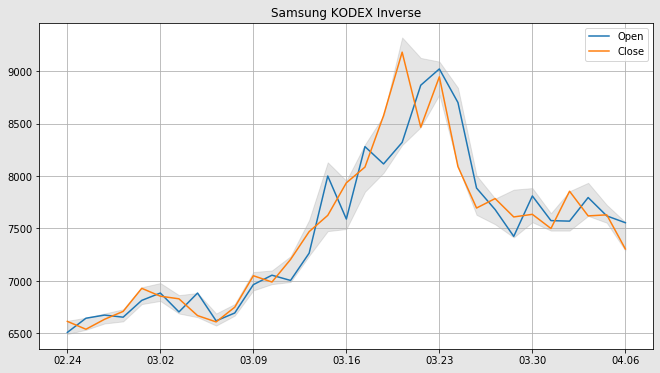

In [217]:
import matplotlib.pyplot as plt
import investpy
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates

asset = 'Samsung KODEX Inverse'
# fromDate = '01/03/2020'
tickFreq = 5
today = date.today()
fromDate = today - timedelta(weeks=6) - timedelta(days=1)
fromDate = fromDate.strftime("%d/%m/%Y")

etfs_kr = investpy.etfs.get_etfs('south korea')
# print("\n".join([name for name in etfs_kr['name']]))

def getData(name):
    df = investpy.get_etf_historical_data(etf=name,
                                    country='south korea',
                                    interval='Daily',
                                    from_date=fromDate,
                                    to_date=today.strftime("%d/%m/%Y"))
    # delete non-business day
    df = df[~(df.iloc[:,1] == df.iloc[:,2])]
#     print(df.head(10))
    return df

df = getData(asset)
fig = plt.figure(figsize=[11,6])

ax = fig.add_subplot(1,1,1)
ax.plot(range(df.index.size), df[['Open','Close']])

ax.set_xticks(range(0,df.index.size,tickFreq))
xTickLabels = list(df.index.strftime("%m.%d"))[::tickFreq]
ax.set_xticklabels(xTickLabels)

ax.legend(('Open','Close'))
ax.set_title(asset)

ax.fill_between(range(df.index.size), df['Low'], df['High'], color='Gray', alpha=0.2)
ax.grid(True)
fig.patch.set_facecolor((0.9, 0.9, 0.9))


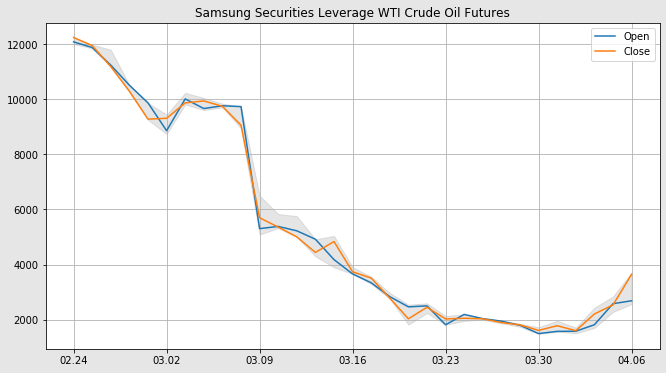

In [216]:
import matplotlib.pyplot as plt
import investpy
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates

asset = 'Samsung Securities Leverage WTI Crude Oil Futures'
tickFreq = 5
today = date.today()
fromDate = today - timedelta(weeks=6) - timedelta(days=1)
fromDate = fromDate.strftime("%d/%m/%Y")

etfs_kr = investpy.etfs.get_etfs('south korea')
# print("\n".join([name for name in etfs_kr['name']]))

def getData(name):
    df = investpy.get_etf_historical_data(etf=name,
                                    country='south korea',
                                    interval='Daily',
                                    from_date=fromDate,
                                    to_date=today.strftime("%d/%m/%Y"))
    # delete non-business day
    df = df[~(df.iloc[:,1] == df.iloc[:,2])]
#     print(df.head(10))
    return df

df = getData(asset)
fig = plt.figure(figsize=[11,6])

ax = fig.add_subplot(1,1,1)
ax.plot(range(df.index.size), df[['Open','Close']])

ax.set_xticks(range(0,df.index.size,tickFreq))
xTickLabels = list(df.index.strftime("%m.%d"))[::tickFreq]
ax.set_xticklabels(xTickLabels)

ax.legend(('Open','Close'))
ax.set_title(asset)

ax.fill_between(range(df.index.size), df['Low'], df['High'], color='Gray', alpha=0.2)
ax.grid(True)
fig.patch.set_facecolor((0.9, 0.9, 0.9))


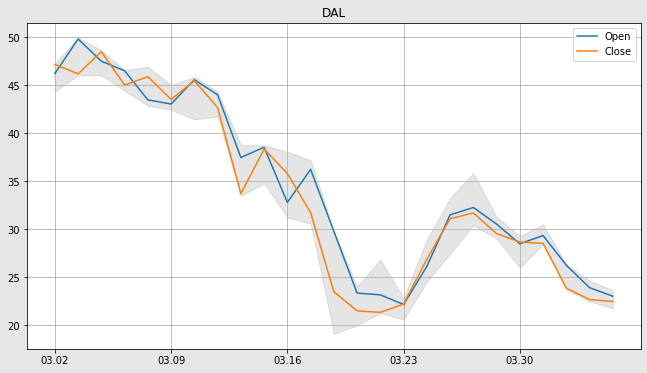

In [218]:
import matplotlib.pyplot as plt
import investpy
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates

asset = 'Delta Airlines'
asset = 'DAL'
# fromDate = '01/03/2020'
tickFreq = 5
today = date.today()
fromDate = today - timedelta(weeks=5) - timedelta(days=1)
fromDate = fromDate.strftime("%d/%m/%Y")

# print(investpy.get_stock_countries())

def getData(name):
    df = investpy.get_stock_historical_data(stock=name,
                                            country='united states',
                                            from_date=fromDate,
                                            to_date=today.strftime("%d/%m/%Y"),
                                            as_json=False, order='ascending')

    # delete non-business day
    df = df[~(df.iloc[:,1] == df.iloc[:,2])]
    return df

df = getData(asset)
fig = plt.figure(figsize=[11,6])

ax = fig.add_subplot(1,1,1)
ax.plot(range(df.index.size), df[['Open','Close']])

ax.set_xticks(range(0,df.index.size,tickFreq))
xTickLabels = list(df.index.strftime("%m.%d"))[::tickFreq]
ax.set_xticklabels(xTickLabels)

ax.legend(('Open','Close'))
ax.set_title(asset)

ax.fill_between(range(df.index.size), df['Low'], df['High'], color='Gray', alpha=0.2)
ax.grid(True)
fig.patch.set_facecolor((0.9, 0.9, 0.9))
